<a href="https://colab.research.google.com/github/Gulshansiharas/C-program/blob/main/lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/advertising.csv')

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

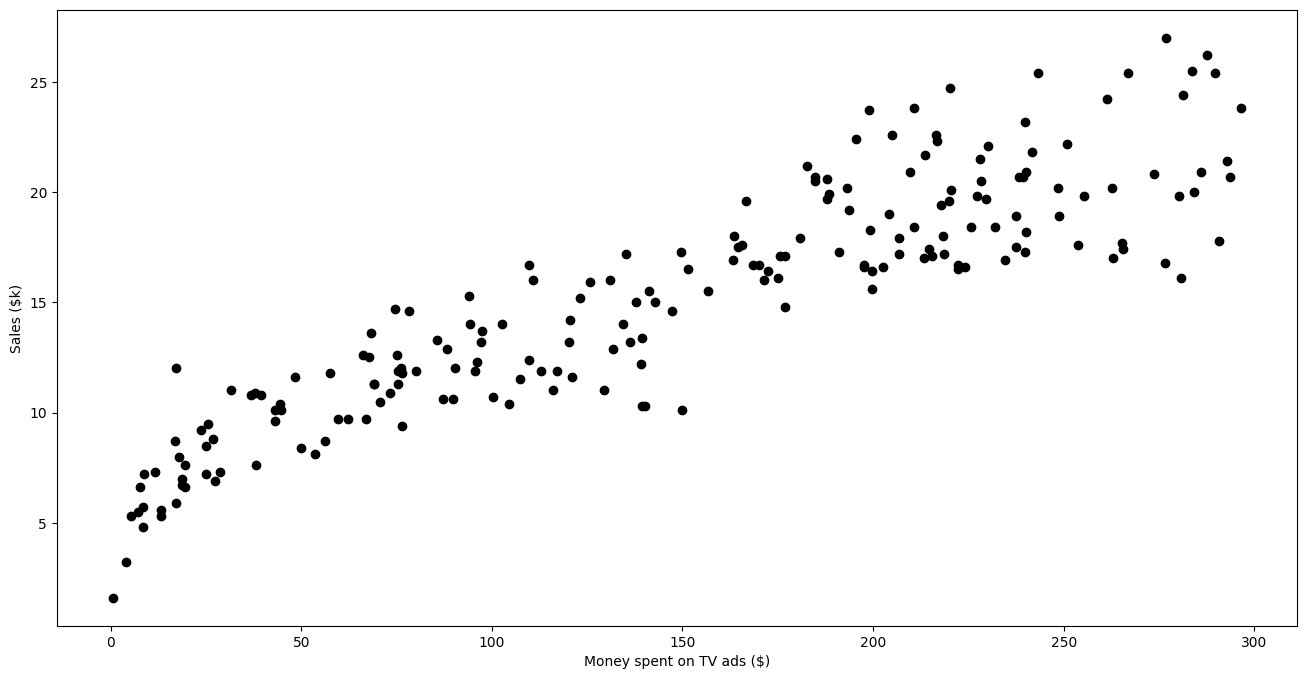

In [ ]:
scatter_plot('TV', 'Sales')

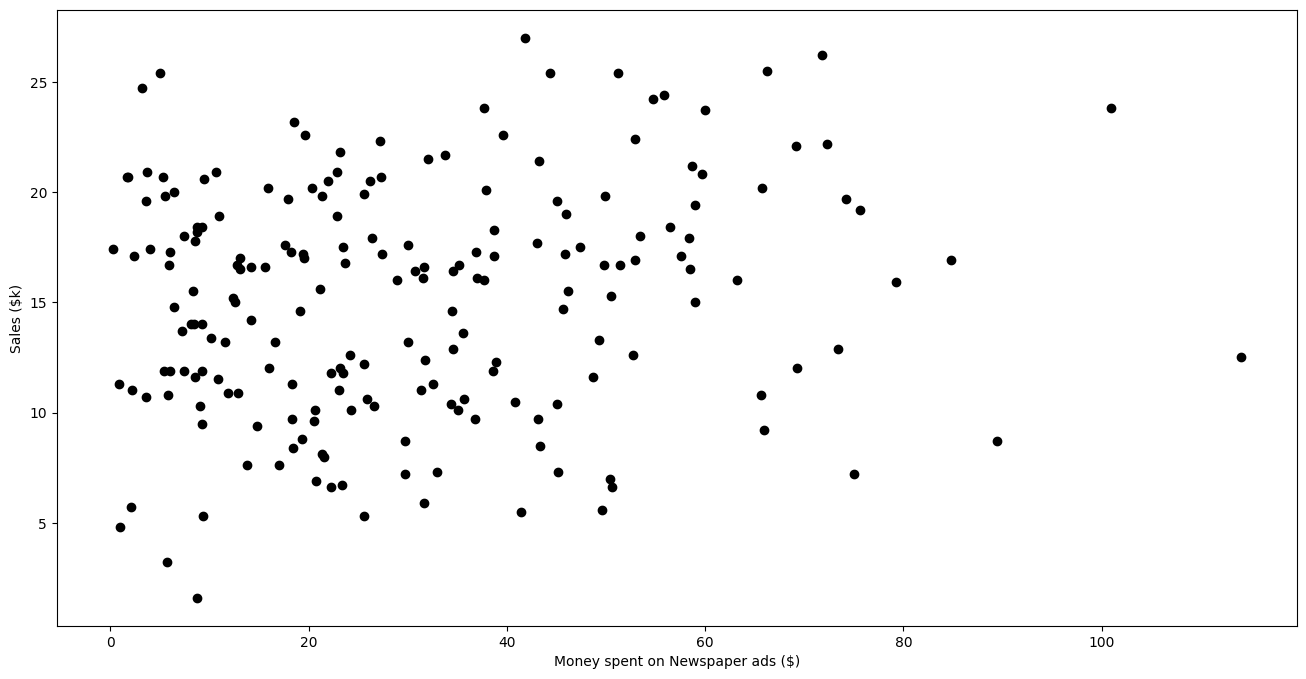

In [ ]:
scatter_plot('Newspaper', 'Sales')

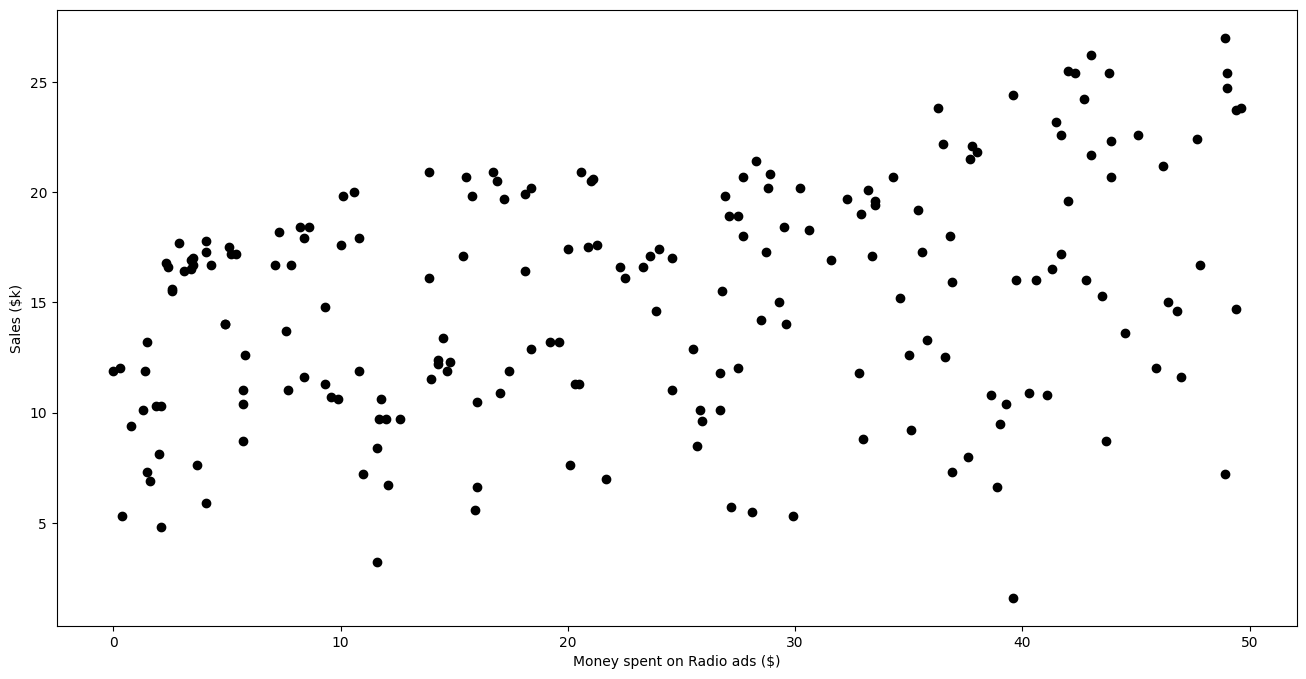

In [ ]:
scatter_plot('Radio','Sales')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
xs=data.drop(['Sales'],axis=1)
y=data['Sales'].values.reshape(-1,1)
lin_reg=LinearRegression()
MSEs=cross_val_score(lin_reg,xs,y, scoring='neg_mean_squared_error', cv=5)
mean_MSE=np.mean(MSEs)
print(mean_MSE)

-2.8582430099910097


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge=Ridge()
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(xs,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_

{'alpha': 20}

In [ ]:
ridge_regressor.best_score_

-2.858183819191847

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv =5)
lasso_regressor.fit(xs, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.900e+02, tolerance: 4.587e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.968e+02, tolerance: 4.451e-01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_

{'alpha': 1}

In [ ]:
lasso_regressor.best_score_

-2.851375129372136

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [0.001,0.0001, 1, 5, 10, 20]
ridge=Ridge()
parameters={'alpha':[0.001,0.0001, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(xs,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.0001, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_

{'alpha': 20}

In [ ]:
ridge_regressor.best_score_

-2.858183819191847